# Курсовой проект.

### Задание для курсового проекта

Метрика:
$R^2$ - коэффициент детерминации

Kaggle:
https://www.kaggle.com/c/real-estate-price-prediction-ds1

Kaggle nickname: tomasbaitinger 

Задача в этом соревновании - предсказать цены на квартиры.

#### File descriptions
<ul>
<li>train.csv - the training set</li>
<li>test.csv - the test set</li>
<li>sampleSubmission.csv - a sample submission file in the correct format</li>
</ul>

#### Data fields
<ul>
<li>Id - идентификационный номер квартиры</li>
<li>DistrictId- идентификационный номер района</li>
<li>Rooms - количество комнат</li>
<li>Square - площадь</li>
<li>LifeSquare - жилая площадь</li>
<li>KitchenSquare - площадь кухни</li>
<li>Floor - этаж</li>
<li>HouseFloor - количество этажей в доме</li>
<li>HouseYear - год постройки дома</li>
<li>Ecology_1, Ecology_2, Ecology_3 - экологические показатели местности</li>
<li>Social_1, Social_2, Social_3 - социальные показатели местности</li>
<li>Healthcare_1, Helthcare_2 - показатели местности, связанные с охраной здоровья</li>
<li>Shops_1, Shops_2 - показатели, связанные с наличием магазинов, торговых центров</li>
<li>Price - цена квартиры</li>
</ul>

### Покдлючение библиотек

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import KFold, GridSearchCV


import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
import warnings
warnings.filterwarnings('ignore')
matplotlib.rcParams.update({'font.size': 11})

### Загрузка данных

In [3]:
test_df = pd.read_csv('test.csv')
train_df = pd.read_csv('train.csv')
sample_submission = pd.read_csv('sample_submission.csv')

### EDA

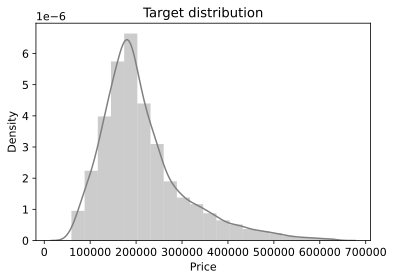

In [4]:
sns.distplot(train_df['Price'], bins=20, color='grey').set(title='Target distribution');

Распределение целевой переменной выглядит хорошо, без выбросов.

Теперь посмотрим визуально на признаки, их квантили, и примерно оценим выбросы и Null значения.

In [5]:
train_df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

Есть Null значения в LifeSquare и Healthcare_1, обратимся к ним позже.

In [7]:
num_features = train_df.select_dtypes(include=['float64', 'float32', 'float16', 'int64'])
num_features.drop(columns='Id', inplace=True)

Категориальные признаки - заменяем на dummy значения 0 и 1 

In [8]:
replacement_for_categorial = {'A':0, 'B':'1'}

In [9]:
train_df['Shops_2'] = train_df['Shops_2'].replace(replacement_for_categorial)
train_df['Ecology_2'] = train_df['Ecology_2'].replace(replacement_for_categorial)
train_df['Ecology_3'] = train_df['Ecology_3'].replace(replacement_for_categorial)

Далее визуально оглядим выбросы в признаках.

Работа с выбросами будет оформлена далее в виде функции, для того, чтобы не загрязнять ноутбук. 

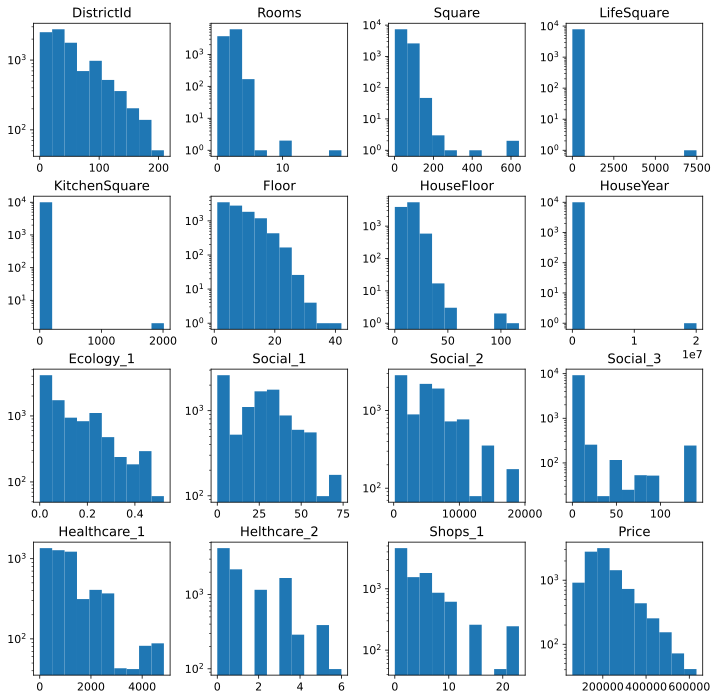

In [10]:
num_features.hist(figsize=(12, 12), bins=10, grid=False, log=True);

Матрица коррелляций для первоначального визуального осмотра возможных линейных зависимостей между признаками.

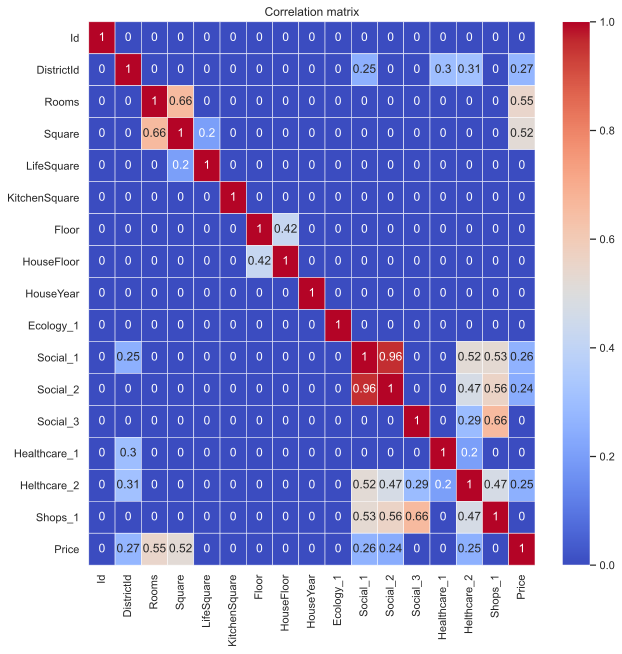

In [11]:
plt.figure(figsize = (10,10))

sns.set(font_scale=1)

corr_matrix = train_df.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.2] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

Видим, что есть очевидная зависимость между Price и Rooms, Square, остальные признаки имеют слабую коррелляцию. Скорее всего, далее на feautre importances, Rooms и Square буду играть наибольшую роль.

### Обработка выбросов.

Повторюсь, подробный код с обработкой данных будет находиться далее в одной функции, но краткое описание проделанных работ следующее:
    <ul>
<li>Rooms = 0 меняю на 1</li>
<li>Rooms >= 6 меняю на медиану</li>

<li>LifeSquare Null заполняю LifeSquare медианой</li>
<li>Square больше 300 или меньше 20 меняю на медиану</li>
<li>LifeSquare больше 90 или меньше 15 меняю на медиану</li>
<li>KitchenSquare меньше 3 меняю на 3</li>
<li>KitchenSquare больше 16 меняю на медиану</li>
<li>Проверяю, чтобы KitchenSquare + LifeSquare не было больше Square. Если нужно, меняю на медианы такие значения.</li>

<li>HouseFloor равный 0 меняю на медиану</li>
<li>HouseFloor и Floor большие 25 меняю на медиану</li>

<li>HouseYear больший 2020 или меньший 1925 меняю на медиану</li>

<li>Пропуски в Healthcare_1 заполняю медианой</li>

<li>Ecology_2, Ecology_3, Shops_2, Helthcare_2 показывают мусорное влияение на модель, эти признаки в итоге удаляются.</li>
    <li>Id так же удаляется</li>
    <ul>

Для обработки выбросов медиана показала наибольше положительное влияние на модель, я тестировал моду и арифметическое отклонение, но выбор остановился на медиане. Среднее арифметическое я буду использовать для генерации фич.

### Построение новых признаков.

Много экспериментировал с признаками, но наибольшее влияение на модель оказали следующие:
    <ul>
<li>Square per room - сколько квадратных метров приходится на комнаты</li>
<li>healthcare_per_district - среднее значение healthcare для района</li>
    <li>ecology_per_district - среднее значение ecology для района</li>
    <li>social_per_district - среднее значение social для района</li>
    <li>shops_per_district - среднее значение shops для района</li>
    <li>% Lifesquare - процент площади LifeSquare от Square</li>
    <li>% KitchenSquare - процент площади KitchenSquare от Square</li>
    </ul>
    
    
 Я так же пробовал использовать различные категориальные признаки, например Is_district_large или House_year_category, но я не получал нужного результата. 
 Пробовал Is_floor_high и Is_housefloor_high, признаки показывающие высоко ли находится квартира, или высокий ли дом, но все равно не получил прироста в $R^2$

Далее создаю класс для предобработки данных.

метод fit собирает в себя нужные данные, такие как медиана, мода, среднее, и т.п. из train набора данных.

метод transform обрабатывает датасет, работает с выбросами и новыми фичами.

In [12]:
class DataPreprocessing:
    """Подготовка исходных данных"""

    def __init__(self):
        """Параметры класса"""
        self.medians=None
        self.means = None
        self.modes = None
        self.ecology_per_district = None
        self.social_per_district = None
        self.healthcare_per_district = None
        self.shops_per_district = None
        
    def fit(self, X):
        """Сохранение статистик"""       
        # Расчет медиан
        self.medians = X.median()
        self.means = X.mean()
        self.modes = X.mode()
        self.ecology_per_district = pd.DataFrame(X.groupby('DistrictId')['Ecology_1'].mean()).astype('float64')
        self.social_per_district = pd.DataFrame(X.groupby('DistrictId')['Social_1'].mean()).astype('float64')
        self.shops_per_district = pd.DataFrame(X.groupby('DistrictId')['Shops_1'].mean()).astype('float64')

    def transform(self, X):
        """Трансформация данных"""

        # Rooms
        X.loc[X['Rooms'] == 0, 'Rooms'] = 1
        X.loc[X['Rooms'] >= 6, 'Rooms'] = self.medians['Rooms']
        
        # Заполнение LifeSquare NaN
        X.loc[X['LifeSquare'].isna(), 'LifeSquare'] = self.medians['LifeSquare']
        
        # Исправляем на медиану Square, где Square больше 300 или меньше 20
        X.loc[(X['Square'] > 300) | (X['Square'] < 20), 'Square'] = self.medians['Square']
        
        # Исправления LifeSquare, в которых LifeSquare больше чем Square
        X.loc[X['Square']<X['LifeSquare'], 'LifeSquare'] = self.medians['LifeSquare']
        
        # Где слишком маленькая жилая площадь заменяем
        X.loc[(X['LifeSquare']<15) | (X['LifeSquare']>90), 'LifeSquare'] = self.medians['LifeSquare']
        
        # Исправления KitchenSquare, в которых KitchenSquare больше чем Square
        X.loc[X['Square']<X['KitchenSquare'], 'KitchenSquare'] = self.medians['KitchenSquare']
        
        # Где слишком маленькая площадь кухни заменяем на 3. Где кухня больше 16, меняем на медиану.
        X.loc[X['KitchenSquare']<3, 'KitchenSquare'] = 3
        X.loc[X['KitchenSquare'] > 16, 'KitchenSquare'] = self.medians['KitchenSquare']
        
        # Заменяем данные, где LifeSquare + KitchenSquare больше чем сама площадь.
        X.loc[X['Square'] < (X['LifeSquare'] + X['KitchenSquare']), 'LifeSquare'] = self.medians['LifeSquare']
        X.loc[X['Square'] < (X['LifeSquare'] + X['KitchenSquare']), 'KitchenSquare'] = self.medians['KitchenSquare']
        
        # Floor и HouseFloor
        X.loc[X['HouseFloor'] == 0, 'HouseFloor'] = self.medians['HouseFloor']
        
        # Почему-то модель хуже обучалась, когда я пытался обработать те ситуации, где Floor больше чем HouseFloor.
        # Поэтому я не менял эти значения.
        
        # Заменяем слишком высокие этажи.
        X.loc[X['HouseFloor']>25, 'Floor'] = self.medians['Floor']
        X.loc[X['HouseFloor']>25, 'HouseFloor'] = self.medians['HouseFloor']
        
        # Новая фича - "Square_per_room"
        X['Square_per_room'] = (X['Square'] / X['Rooms']).astype('float64')
        
        # HouseYear
        X.loc[X['HouseYear'] == 20052011,'HouseYear'] = 2011
        X.loc[(X['HouseYear'] > 2020) | (X['HouseYear'] <= 1925), 'HouseYear'] = self.medians['HouseYear']
        
        # Заполняем пропуски Healthcare_1
        X.loc[X['Healthcare_1'].isna(),'Healthcare_1'] = self.medians['Healthcare_1']

        # Новые фичи - Social per district, ecology per district, healthcare per district
        healthcare_per_district = pd.DataFrame(X.groupby('DistrictId')['Healthcare_1'].mean()).astype('float64')
        X = X.merge(self.ecology_per_district, on='DistrictId', how='left')
        X = X.merge(self.social_per_district, on='DistrictId', how='left')
        X = X.merge(healthcare_per_district, on='DistrictId', how='left')
        X = X.merge(self.shops_per_district, on='DistrictId', how='left')

        # Фича %Lifesquare и %KitchenSquare от Square
        X['%Lifesquare_from_square'] = (X['LifeSquare'] / X['Square'])*100
        X['%Kitchensquare_from_square'] = (X['KitchenSquare'] / X['Square'])*100
        
        # Дропаем признаки Ecology_2, Ecology_3, Shops_2, Id, Helthcare_2 у них мусорная feature imporatances.
        if 'Ecology_2' in X.columns:
            X.drop('Ecology_2', axis=1, inplace=True)
        if 'Ecology_3' in X.columns:
            X.drop('Ecology_3', axis=1, inplace=True)
        if 'Shops_2' in X.columns:
            X.drop('Shops_2', axis=1, inplace=True)
        if 'Helthcare_2' in X.columns:
            X.drop(columns='Helthcare_2', inplace=True)
        if 'Id' in X.columns:
            X.drop(columns='Id', inplace=True)
        
        # По возможности заполняем датасет медианами от train.
        # Затем, если остались еще какие-либо Null значения, тогда уже берем медианы от трансформируемого датасета.
        X.fillna(self.medians, inplace=True) 
        X.fillna(X.median(), inplace=True)
        
        return X

Функция evaluate_preds, для проверки и визуализации pred_values на train и test.

In [13]:
def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):
    print("Train R2:\t" + str(round(r2(train_true_values, train_pred_values), 3)))
    print("Test R2:\t" + str(round(r2(test_true_values, test_pred_values), 3)))
    
    plt.figure(figsize=(10, 5))
    
    plt.subplot(121)
    plt.scatter(x=train_pred_values, y=train_true_values, linewidths=0.2)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    
    plt.scatter(x=test_pred_values, y=test_true_values, linewidths=0.2)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')

    plt.show()

In [14]:
preprocessing = DataPreprocessing()

In [15]:
test_df = pd.read_csv('test.csv')
train_df = pd.read_csv('train.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [16]:
X = train_df.drop(columns='Price')
y = train_df['Price']

In [17]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.05, random_state=21)

Тут у меня возник вопрос, и случилась интересная ситуация. 

Естественно, в процессе настройки модели и работы с данными, я использовал адекватный test_size=0.25. Однако, понимая, что валидировать результат я буду на данных, которые находятся на kaggle, настроив нормальный $R^2$ и Cross Validation score, я решил изменить test_size до 0.05, для того чтобы скормить X_train как можно больше данных из оригинального датафрейма, и чтобы модель обучилась на большем количестве данных. В моем понимании, модель должна работать лучше, если она учится на большем количестве данных. В моей ситуации мне удалось получить некоторый буст в финальной оценке на Kaggle, добрав до показателя коэффициента детерминации $R^2$ = 0.73952 

Когда я тестировал эту же модель, но с test_size=0.25, результат был хуже.

Я не уверен, что это правильное решение, и можно ли так делать, но изменение test_size после финальной настройки модели дал мне буст. Возможно, это просто везение.

fit делаем на train, затем трансформируем train, valid, test

In [18]:
preprocessing.fit(X_train)

X_train = preprocessing.transform(X_train)
X_valid = preprocessing.transform(X_valid)
test_df = preprocessing.transform(test_df)

In [19]:
X_train.shape, X_valid.shape, test_df.shape

((9500, 21), (500, 21), (5000, 21))

In [20]:
X_train.isna().sum().sum(), X_valid.isna().sum().sum(), test_df.isna().sum().sum()

(0, 0, 0)

shape правильный, Null значений не имеется.

### Построение модели.

Выбор пал на <b>GradientBoostingRegressor</b>, он показал наилучший результат из LinearRegression, RandomForestRegressor, DecisionTreeRegressor, KNeighborsRegressor

#### Обучение

In [21]:
gb_model = GradientBoostingRegressor(learning_rate=0.027,
                                     n_estimators=800, 
                                     min_samples_leaf=2, 
                                     max_features=4, 
                                     max_depth=7, 
                                     random_state=21,
                                    )

In [22]:
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.027, max_depth=7, max_features=4,
                          min_samples_leaf=2, n_estimators=800,
                          random_state=21)

Параметры были подобраны без GridSearchCV, он достаточно долго работает, и руками было быстрее понять в какую сторону идти, настраивая модель.

#### Оценка модели

Train R2:	0.957
Test R2:	0.788


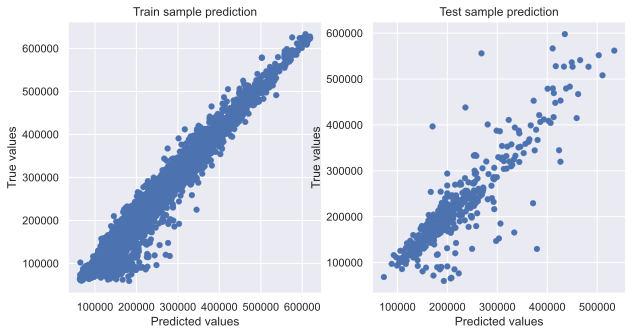

In [23]:
y_train_preds = gb_model.predict(X_train)
y_test_preds = gb_model.predict(X_valid)
evaluate_preds(y_train, y_train_preds, y_valid, y_test_preds)

#### Кросс валидация

In [24]:
cv_score = cross_val_score(gb_model, X_train, y_train, scoring='r2', cv=KFold(n_splits=5, random_state=21))
cv_score

array([0.75749029, 0.72943019, 0.75607061, 0.7852336 , 0.76741237])

In [25]:
cv_score.mean()

0.7591274136914874

#### Важность признаков

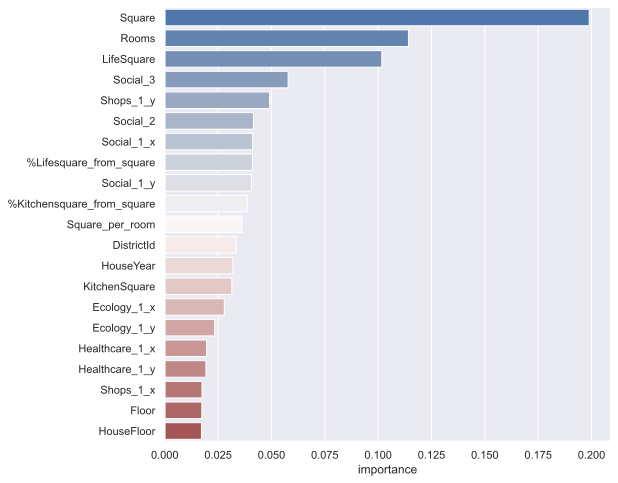

In [26]:
importance = pd.DataFrame(gb_model.feature_importances_, index=X_train.columns, columns=['importance'])
importance = importance.sort_values(by='importance', ascending=False)
plt.figure(figsize=(8, 8))
sns.barplot(importance.importance, importance.index, palette='vlag');

#### Прогнозирование на тестовом датасете 

In [27]:
predictions = gb_model.predict(test_df)
predictions

array([153156.52400752, 225078.42626535, 219439.37577709, ...,
       339466.71011158, 184099.14283832, 174683.68826749])

In [28]:
sample_submission['Price'] = predictions
sample_submission.head()

,Id,Price
0,725,153156.524008
1,15856,225078.426265
2,5480,219439.375777
3,15664,343188.039765
4,14275,144420.624217


In [29]:
sample_submission.to_csv('submit.csv', index=False)


In [30]:
sample_submission.shape

(5000, 2)

Результат на Kaggle $R^2$ = 0.73952

nickname = tomasbaitinger